# Exercise 2.4 – Simulating and Analyzing Brownian Motion in Python

In this exercise, we work with **standard Brownian motion** $W = \{W_t\}_{t \geq 0}$, a fundamental stochastic process in continuous-time finance and probability theory. The goal is to simulate paths of Brownian motion, visualize them, and numerically verify some of its key properties using Python.


In [6]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

### a) Simulating Brownian Motion

Implement a function `BM(T, n)` that simulates one path of Brownian motion on the interval $[0, T]$, using a uniform grid of $n$ steps. The time step is given by $\Delta = T / n$. The function should return the values of $W$ as a vector of length $n + 1$, starting at $W_0 = 0$. Recall that the increments of Brownian motion are independent and normally distributed:

In [7]:
def BM(T,n):
    """
    Simulate a Brownian motion path.

    Parameters
    ----------
    T : float
        The time horizon.
    n : int
        The number of time steps.
    """
    dt = T / n
    t = np.linspace(0,T,n+1)
    W = np.zeros(n+1)
    W[1:] = np.cumsum(np.sqrt(dt) * np.random.normal(size=n))
    return t, W



### b) Plotting Brownian Paths

Set $T = 10$, $n = 1000$, and simulate several independent paths of Brownian motion. Plot all paths in one figure to visualize the variability and structure of Brownian motion.

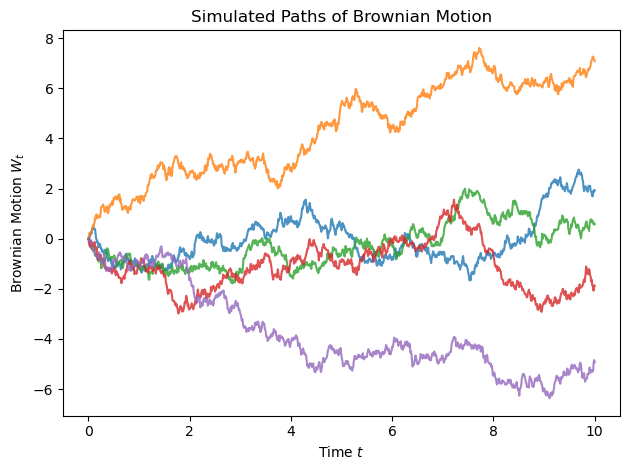

In [8]:
T = 10
n = 1000
for _ in range(5):
    t,W = BM(T,n)
    plt.plot(t,W,alpha=0.8)
plt.title('Simulated Paths of Brownian Motion')
plt.xlabel('Time $t$')
plt.ylabel('Brownian Motion $W_t$')
plt.tight_layout()
plt.show()


### c) Empirical Distribution of $W_t$

Simulate $n$ independent paths of Brownian motion, and for a fixed time $t \in (0, T]$, extract the values $W_t^{(1)}, W_t^{(2)}, \dots, W_t^{(n)}$. Plot the **empirical density** of these values and compare it with the theoretical density of $W_t \sim \mathcal{N}(0, t)$ to verify the distributional property of Brownian motion.


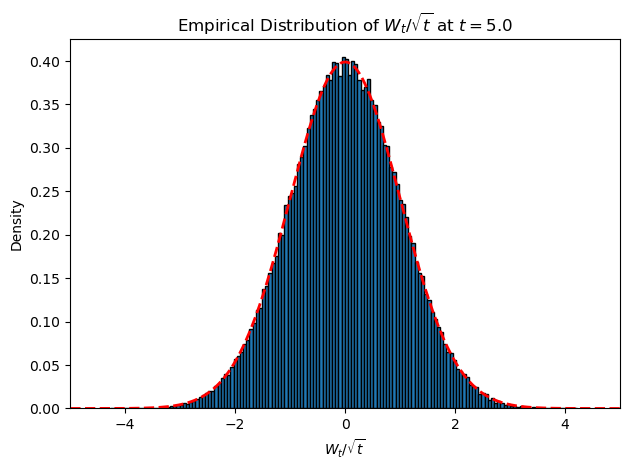

In [9]:
from scipy.stats import norm
numberofsamples = int(1e5)
T = 10
n = 1000
index = int(n / 2)
empiricalWt = []
for _ in range(numberofsamples):
    _,W = BM(T,n)
    empiricalWt.append(W[index])
t = T / 2
plt.hist(np.array(empiricalWt) / np.sqrt(t), bins='auto', density=True, edgecolor='black')
plt.title(rf"Empirical Distribution of $W_t / \sqrt{{t}}$ at $t={t}$")
plt.xlabel(r"$W_t / \sqrt{t}$")
plt.ylabel("Density")
plt.xlim((-5,5))
plt.tight_layout()

x = np.linspace(-5,5,10000)
plt.plot(x, norm.pdf(x), 'r--', linewidth=2, label='Standard Normal PDF')

plt.show()
    

### d) Empirical Covariance of $W_s$ and $W_t$

Define a function `CovBM(s, t, m)` that simulates $m$ samples of $W_s$ and $W_t$, and computes their empirical covariance:

$$
Q := \frac{1}{m - 1} \sum_{i=1}^m (W_s^{(i)} - \bar{W}_s)(W_t^{(i)} - \bar{W}_t),
$$

where $\bar{W}_s$ and $\bar{W}_t$ are the empirical means. Use this function to demonstrate numerically that:

$$
\text{Cov}(W_s, W_t) = \min\{s, t\}.
$$

Set $s = 1$, $t = 2$, and $m = 10000$ to illustrate this property.


In [10]:
def CovBM(s, t, m):
    W = np.zeros((m, 2))
    for i in range(m):
        _, path = BM(T, n)
        W[i, 0] = path[int(s * n / T)]
        W[i, 1] = path[int(t * n / T)]
    return np.cov(W[:, 0], W[:, 1])[0, 1]

def CovBM2(s, t):
    return min(s, t)

s, t, m = 1, 2, 1000
emp_cov = CovBM(s, t, m)
theo_cov = CovBM2(s, t)

print(f"Empirical covariance at s={s}, t={t} (m={m}): {emp_cov:.4f}")
print(f"Theoretical covariance: {theo_cov:.4f}")


Empirical covariance at s=1, t=2 (m=1000): 0.9294
Theoretical covariance: 1.0000
